In [192]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error
import numpy as np

In [193]:
np.random.seed(42)
x = np.linspace(0, 3 * np.pi, 500)
y = np.cos(x)

In [194]:
noise_factor = 0.3
y_with_noise = y + noise_factor * np.random.normal(size=len(x))
dataset_without_noise = pd.DataFrame({'x':x,'y':y})
dataset_with_noise = pd.DataFrame({'x':x,'y':y_with_noise})

dataset_without_noise = dataset_without_noise.sample(frac=1).reset_index(drop=True)
dataset_with_noise = dataset_with_noise.sample(frac=1).reset_index(drop=True)

In [195]:
train_ratio = 0.8

train_size = int(len(dataset_without_noise) * train_ratio)

train_data_without_noise = dataset_without_noise[:train_size]
test_data_without_noise = dataset_without_noise[train_size:]

train_data_with_noise = dataset_with_noise[:train_size]
test_data_with_noise = dataset_with_noise[train_size:]

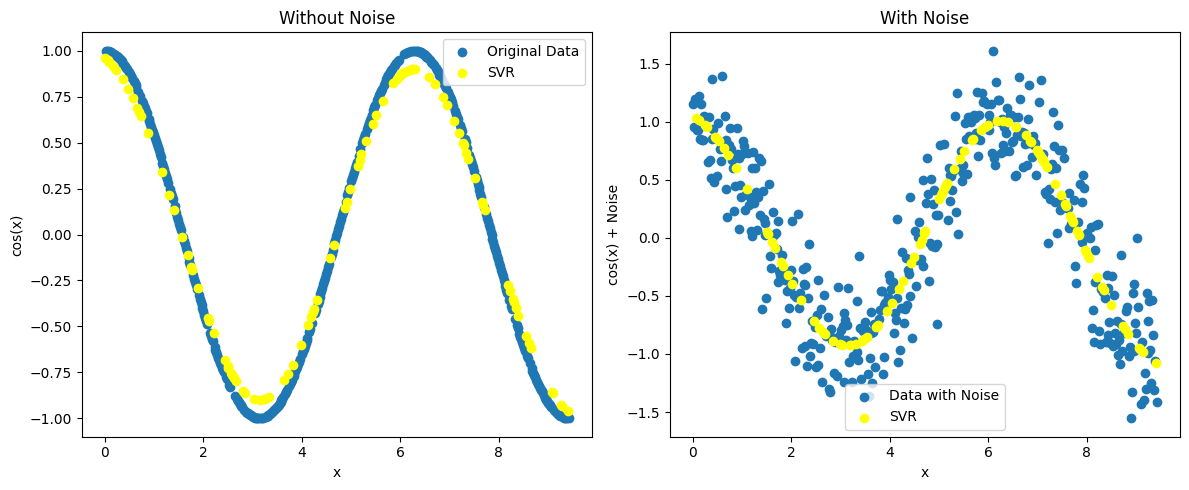

Mean Squared Error without noise: 0.005328501630300984
Mean Squared Error with noise: 0.08817950545254187


In [196]:
warnings.filterwarnings("ignore")

model_without_noise = SVR(kernel='rbf')
model_with_noise = SVR(kernel='rbf')

model_without_noise.fit(train_data_without_noise[['x']], train_data_without_noise[['y']])
model_with_noise.fit(train_data_with_noise[['x']], train_data_with_noise[['y']])

ypred_without_noise = model_without_noise.predict(test_data_without_noise[['x']])
ypred_with_noise = model_with_noise.predict(test_data_with_noise[['x']])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_data_without_noise[['x']], train_data_without_noise[['y']], label='Original Data')
plt.scatter(test_data_without_noise[['x']], ypred_without_noise, color='yellow', label='SVR')
plt.title('Without Noise')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(train_data_with_noise[['x']], train_data_with_noise[['y']], label='Data with Noise')
plt.scatter(test_data_with_noise[['x']], ypred_with_noise, color='yellow', label='SVR')
plt.title('With Noise')
plt.xlabel('x')
plt.ylabel('cos(x) + Noise')
plt.legend()

plt.tight_layout()
plt.show()

mse_without_noise = mean_squared_error(test_data_without_noise[['y']], ypred_without_noise)
mse_with_noise = mean_squared_error(test_data_with_noise[['y']], ypred_with_noise)

print("Mean Squared Error without noise:", mse_without_noise)
print("Mean Squared Error with noise:", mse_with_noise)